Importing important libraries  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import time

Load the data we will use mnist dataset

In [ ]:

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

y = y.astype(np.uint8)
X = X / 255.0

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (70000, 784)
Labels shape: (70000,)


split the data into


*   x train

*   y train
*   x test


*   y test



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

One hot encoder
transforms categorical class labels---> binary vector

In [ ]:

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

y_train_onehot = one_hot(y_train, 10)
y_test_onehot = one_hot(y_test, 10)

Class neural network:

*   implementing forward propagation using ReLU and softmax
*   backpropagation with gradient descent

*   functions for training and loss computation and prediction


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.layer_sizes = [input_size] + hidden_sizes + [output_size]
        self.weights = []
        self.biases = []

        for i in range(len(self.layer_sizes)-1):
            self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * 0.01)
            self.biases.append(np.zeros((1, self.layer_sizes[i+1])))

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.activations = [X]
        self.z_values = []

        for i in range(len(self.weights)-1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            self.activations.append(self.relu(z))

        # Output layer with softmax
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.z_values.append(z)
        self.activations.append(self.softmax(z))

        return self.activations[-1]

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        deltas = [self.activations[-1] - y]

        #  yalla nbdaa fe el Backpropagation
        for i in range(len(self.weights)-1, 0, -1):
            delta = np.dot(deltas[-1], self.weights[i].T) * self.relu_derivative(self.activations[i])
            deltas.append(delta)

        deltas.reverse()

        # hna hn3ml Update ll  weights w el  biases
        for i in range(len(self.weights)):
            dw = np.dot(self.activations[i].T, deltas[i]) / m
            db = np.sum(deltas[i], axis=0, keepdims=True) / m
            self.weights[i] -= learning_rate * dw
            self.biases[i] -= learning_rate * db

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def train(self, X, y, epochs, learning_rate, batch_size=32):
        losses = []
        val_accuracies  = []
        for epoch in range(epochs):
            start_time = time.time()
            # Mini-batch gradient descent
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch, learning_rate)

            # Compute loss on training set
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            losses.append(loss)

            y_val_pred = self.predict(X_test)
            val_accuracy = accuracy_score(y_test, y_val_pred)
            val_accuracies.append(val_accuracy)

            end_time = time.time()

            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f} - "
              f"Val Accuracy: {val_accuracy:.4f} - Time: {end_time - start_time:.2f}s")
        return losses,val_accuracies

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)



In [ ]:
input_size = X_train.shape[1]
hidden_sizes = [128, 64]
output_size = 10

The first model--> initialize and train the neural network with the basic configuration of two hidden layers (128 & 64) for 50 epochs

In [ ]:

# Trial 1: awl model 2 hidden layers (128,64) (Basic configuration)
print("Trial 1: Basic configuration (128, 64 hidden layers)")
model1 = NeuralNetwork(input_size, hidden_sizes, output_size)
losses1, val_accuracies1 = model1.train(X_train, y_train_onehot, epochs=50, learning_rate=0.01)

Trial 1: Basic configuration (128, 64 hidden layers)
Epoch 1/50 - Loss: 2.2998 - Val Accuracy: 0.1143 - Time: 4.00s
Epoch 2/50 - Loss: 2.1245 - Val Accuracy: 0.2256 - Time: 3.46s
Epoch 3/50 - Loss: 0.7012 - Val Accuracy: 0.7784 - Time: 2.65s
Epoch 4/50 - Loss: 0.5735 - Val Accuracy: 0.8290 - Time: 4.54s
Epoch 5/50 - Loss: 0.4687 - Val Accuracy: 0.8636 - Time: 2.61s
Epoch 6/50 - Loss: 0.3781 - Val Accuracy: 0.8879 - Time: 2.64s
Epoch 7/50 - Loss: 0.3261 - Val Accuracy: 0.9030 - Time: 2.67s
Epoch 8/50 - Loss: 0.2858 - Val Accuracy: 0.9147 - Time: 3.12s
Epoch 9/50 - Loss: 0.2523 - Val Accuracy: 0.9236 - Time: 3.89s
Epoch 10/50 - Loss: 0.2243 - Val Accuracy: 0.9317 - Time: 2.60s
Epoch 11/50 - Loss: 0.2010 - Val Accuracy: 0.9374 - Time: 2.59s
Epoch 12/50 - Loss: 0.1820 - Val Accuracy: 0.9413 - Time: 2.58s
Epoch 13/50 - Loss: 0.1659 - Val Accuracy: 0.9452 - Time: 4.68s
Epoch 14/50 - Loss: 0.1524 - Val Accuracy: 0.9482 - Time: 2.60s
Epoch 15/50 - Loss: 0.1412 - Val Accuracy: 0.9519 - Time: 2.

In [ ]:
# Evaluate the accuracy for the first Trial elhamdolallah 97% :)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Test Accuracy (Trial 1): {accuracy1:.4f}")

Test Accuracy (Trial 1): 0.9701


the second model --> train a deeper neural network with three hidden layers (256 & 128 & 64) to compare performance with the basic model

In [ ]:
# Trial 2: hna hanzod el model 1 hidden layer kman b (256) (Deeper network)
print("\nTrial 2: Deeper network (256, 128, 64 hidden layers)")
model2 = NeuralNetwork(input_size, [256, 128, 64], output_size)
losses2, val_accuracies2 = model2.train(X_train, y_train_onehot, epochs=50, learning_rate=0.01)


Trial 2: Deeper network (256, 128, 64 hidden layers)
Epoch 1/50 - Loss: 2.3012 - Val Accuracy: 0.1143 - Time: 5.40s
Epoch 2/50 - Loss: 2.3012 - Val Accuracy: 0.1143 - Time: 5.44s
Epoch 3/50 - Loss: 2.3012 - Val Accuracy: 0.1143 - Time: 6.87s
Epoch 4/50 - Loss: 2.3011 - Val Accuracy: 0.1143 - Time: 5.20s
Epoch 5/50 - Loss: 2.3011 - Val Accuracy: 0.1143 - Time: 7.37s
Epoch 6/50 - Loss: 2.3010 - Val Accuracy: 0.1143 - Time: 5.31s
Epoch 7/50 - Loss: 2.3007 - Val Accuracy: 0.1143 - Time: 7.31s
Epoch 8/50 - Loss: 2.3001 - Val Accuracy: 0.1143 - Time: 5.25s
Epoch 9/50 - Loss: 2.2966 - Val Accuracy: 0.1143 - Time: 7.33s
Epoch 10/50 - Loss: 2.1033 - Val Accuracy: 0.2139 - Time: 5.23s
Epoch 11/50 - Loss: 1.0363 - Val Accuracy: 0.6305 - Time: 7.40s
Epoch 12/50 - Loss: 0.8127 - Val Accuracy: 0.7343 - Time: 5.21s
Epoch 13/50 - Loss: 0.5163 - Val Accuracy: 0.8518 - Time: 7.30s
Epoch 14/50 - Loss: 0.3723 - Val Accuracy: 0.8914 - Time: 5.29s
Epoch 15/50 - Loss: 0.3110 - Val Accuracy: 0.9084 - Time: 7

In [ ]:
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Test Accuracy (Trial 2): {accuracy2:.4f}")

Test Accuracy (Trial 2): 0.9661


the final model --> train the basic network architecture using a higher learning rate (0.05) to observe its effect on training speed and accuracy

In [ ]:
# Trial 3: Hna hnzod el learning rate hn5leh b (0.05) bdl mn (0.01) (Higher learning rate)
print("\nTrial 3: Higher learning rate (0.05)")
model3 = NeuralNetwork(input_size, hidden_sizes, output_size)
losses3, val_accuracies3 = model3.train(X_train, y_train_onehot, epochs=50, learning_rate=0.05)


Trial 3: Higher learning rate (0.05)
Epoch 1/50 - Loss: 0.4325 - Val Accuracy: 0.8707 - Time: 2.60s
Epoch 2/50 - Loss: 0.2300 - Val Accuracy: 0.9259 - Time: 2.55s
Epoch 3/50 - Loss: 0.1529 - Val Accuracy: 0.9468 - Time: 3.29s
Epoch 4/50 - Loss: 0.1156 - Val Accuracy: 0.9554 - Time: 3.53s
Epoch 5/50 - Loss: 0.0938 - Val Accuracy: 0.9610 - Time: 2.51s
Epoch 6/50 - Loss: 0.0774 - Val Accuracy: 0.9636 - Time: 2.58s
Epoch 7/50 - Loss: 0.0643 - Val Accuracy: 0.9662 - Time: 2.53s
Epoch 8/50 - Loss: 0.0556 - Val Accuracy: 0.9673 - Time: 4.73s
Epoch 9/50 - Loss: 0.0487 - Val Accuracy: 0.9686 - Time: 2.56s
Epoch 10/50 - Loss: 0.0431 - Val Accuracy: 0.9694 - Time: 2.57s
Epoch 11/50 - Loss: 0.0393 - Val Accuracy: 0.9701 - Time: 2.49s
Epoch 12/50 - Loss: 0.0359 - Val Accuracy: 0.9702 - Time: 4.65s
Epoch 13/50 - Loss: 0.0336 - Val Accuracy: 0.9698 - Time: 2.59s
Epoch 14/50 - Loss: 0.0314 - Val Accuracy: 0.9689 - Time: 2.66s
Epoch 15/50 - Loss: 0.0262 - Val Accuracy: 0.9701 - Time: 2.55s
Epoch 16/50

In [ ]:
#dah a3la wahed 3ndena f hn5leh el best model isa
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Test Accuracy (Trial 3): {accuracy3:.4f}")

Test Accuracy (Trial 3): 0.9756


In [ ]:
# el cell di 3lshan ashof fe overfitting wla la
best_model = model3
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation (Test) Accuracy: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.05:
    print(" Possible overfitting detected.")
else:
    print(" No significant overfitting detected.")


Training Accuracy: 1.0000
Validation (Test) Accuracy: 0.9756
 No significant overfitting detected.


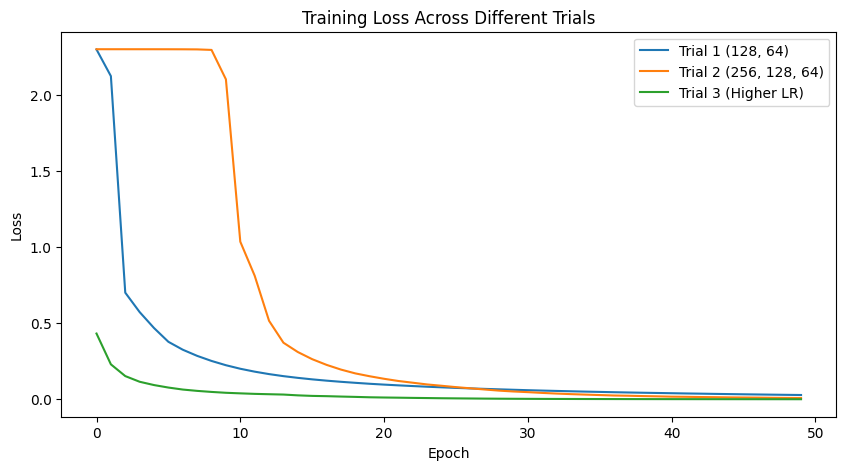

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(losses1, label='Trial 1 (128, 64)')
plt.plot(losses2, label='Trial 2 (256, 128, 64)')
plt.plot(losses3, label='Trial 3 (Higher LR)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Across Different Trials')
plt.legend()
plt.show()

In [ ]:
# Confusion matrix for best model elly howa trial 3 (higher LR)
best_model = model3
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

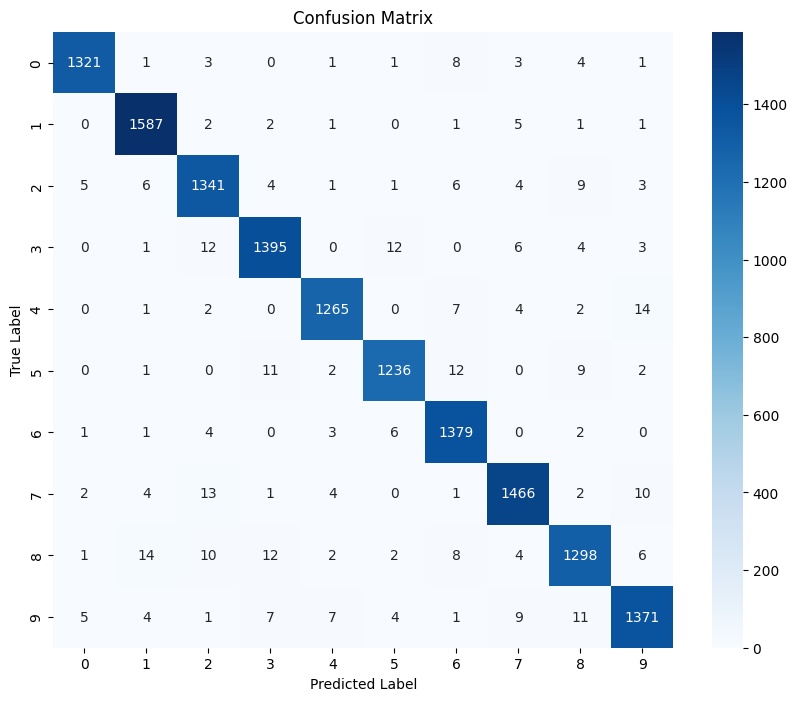

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

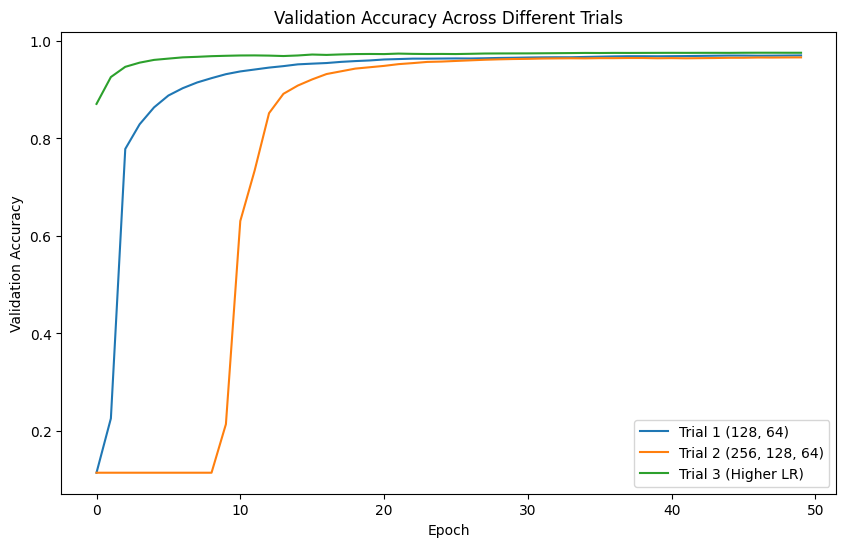

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(val_accuracies1, label='Trial 1 (128, 64)')
plt.plot(val_accuracies2, label='Trial 2 (256, 128, 64)')
plt.plot(val_accuracies3, label='Trial 3 (Higher LR)')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across Different Trials')
plt.legend()
plt.show()

In [ ]:
class NeuralNetworkWithOptimizers(NeuralNetwork):
    def __init__(self, input_size, hidden_sizes, output_size, optimizer='sgd'):
        super().__init__(input_size, hidden_sizes, output_size)
        self.optimizer = optimizer
        if optimizer == 'adam':

            self.m_weights = [np.zeros_like(w) for w in self.weights]
            self.v_weights = [np.zeros_like(w) for w in self.weights]
            self.m_biases = [np.zeros_like(b) for b in self.biases]
            self.v_biases = [np.zeros_like(b) for b in self.biases]
            self.beta1 = 0.9
            self.beta2 = 0.999
            self.epsilon = 1e-8
            self.t = 0

    def update_with_sgd(self, dw, db, i, learning_rate):
        self.weights[i] -= learning_rate * dw
        self.biases[i] -= learning_rate * db

    def update_with_adam(self, dw, db, i, learning_rate):
        self.t += 1
        # Update weights
        self.m_weights[i] = self.beta1 * self.m_weights[i] + (1 - self.beta1) * dw
        self.v_weights[i] = self.beta2 * self.v_weights[i] + (1 - self.beta2) * (dw**2)

        m_hat = self.m_weights[i] / (1 - self.beta1**self.t)
        v_hat = self.v_weights[i] / (1 - self.beta2**self.t)

        self.weights[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

        # Update biases
        self.m_biases[i] = self.beta1 * self.m_biases[i] + (1 - self.beta1) * db
        self.v_biases[i] = self.beta2 * self.v_biases[i] + (1 - self.beta2) * (db**2)

        m_hat = self.m_biases[i] / (1 - self.beta1**self.t)
        v_hat = self.v_biases[i] / (1 - self.beta2**self.t)

        self.biases[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        deltas = [self.activations[-1] - y]

        for i in range(len(self.weights)-1, 0, -1):
            delta = np.dot(deltas[-1], self.weights[i].T) * self.relu_derivative(self.activations[i])
            deltas.append(delta)

        deltas.reverse()

        for i in range(len(self.weights)):
            dw = np.dot(self.activations[i].T, deltas[i]) / m
            db = np.sum(deltas[i], axis=0, keepdims=True) / m

            if self.optimizer == 'adam':
                self.update_with_adam(dw, db, i, learning_rate)
            else:
                self.update_with_sgd(dw, db, i, learning_rate)


Train the neural network using the SGD optimizer for 30 epochs and evaluate test accuracy

In [ ]:
print("Training with SGD optimizer:")
model_sgd = NeuralNetworkWithOptimizers(input_size, [128, 64], output_size, optimizer='sgd')
losses_sgd,_ = model_sgd.train(X_train, y_train_onehot, epochs=30, learning_rate=0.01)
y_pred_sgd = model_sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Test Accuracy: {accuracy_sgd:.4f}")

Training with SGD optimizer:
Epoch 1/30 - Loss: 2.3003 - Val Accuracy: 0.1143 - Time: 2.60s
Epoch 2/30 - Loss: 2.2527 - Val Accuracy: 0.2090 - Time: 2.90s
Epoch 3/30 - Loss: 0.8363 - Val Accuracy: 0.7481 - Time: 4.30s
Epoch 4/30 - Loss: 0.5795 - Val Accuracy: 0.8302 - Time: 2.58s
Epoch 5/30 - Loss: 0.4785 - Val Accuracy: 0.8606 - Time: 2.58s
Epoch 6/30 - Loss: 0.3922 - Val Accuracy: 0.8841 - Time: 2.67s
Epoch 7/30 - Loss: 0.3392 - Val Accuracy: 0.8979 - Time: 4.66s
Epoch 8/30 - Loss: 0.2978 - Val Accuracy: 0.9100 - Time: 2.58s
Epoch 9/30 - Loss: 0.2631 - Val Accuracy: 0.9201 - Time: 2.58s
Epoch 10/30 - Loss: 0.2335 - Val Accuracy: 0.9281 - Time: 2.54s
Epoch 11/30 - Loss: 0.2088 - Val Accuracy: 0.9349 - Time: 4.70s
Epoch 12/30 - Loss: 0.1885 - Val Accuracy: 0.9396 - Time: 2.57s
Epoch 13/30 - Loss: 0.1719 - Val Accuracy: 0.9441 - Time: 2.60s
Epoch 14/30 - Loss: 0.1580 - Val Accuracy: 0.9472 - Time: 2.65s
Epoch 15/30 - Loss: 0.1463 - Val Accuracy: 0.9498 - Time: 4.78s
Epoch 16/30 - Loss: 

Train the neural network using the Adam optimizer for 30 epochs with a learning rate of 0.001 and evaluate test accuracy

In [ ]:

print("\nTraining with Adam optimizer:")
model_adam = NeuralNetworkWithOptimizers(input_size, [128, 64], output_size, optimizer='adam')
losses_adam,_ = model_adam.train(X_train, y_train_onehot, epochs=30, learning_rate=0.001)
y_pred_adam = model_adam.predict(X_test)
accuracy_adam = accuracy_score(y_test, y_pred_adam)
print(f"Adam Test Accuracy: {accuracy_adam:.4f}")


Training with Adam optimizer:
Epoch 1/30 - Loss: 0.1708 - Val Accuracy: 0.9438 - Time: 15.31s
Epoch 2/30 - Loss: 0.1028 - Val Accuracy: 0.9584 - Time: 4.65s
Epoch 3/30 - Loss: 0.0770 - Val Accuracy: 0.9625 - Time: 9.42s
Epoch 4/30 - Loss: 0.0618 - Val Accuracy: 0.9641 - Time: 6.90s
Epoch 5/30 - Loss: 0.0490 - Val Accuracy: 0.9667 - Time: 6.29s
Epoch 6/30 - Loss: 0.0398 - Val Accuracy: 0.9701 - Time: 8.40s
Epoch 7/30 - Loss: 0.0450 - Val Accuracy: 0.9671 - Time: 6.40s
Epoch 8/30 - Loss: 0.0365 - Val Accuracy: 0.9694 - Time: 8.41s
Epoch 9/30 - Loss: 0.0225 - Val Accuracy: 0.9725 - Time: 6.85s
Epoch 10/30 - Loss: 0.0244 - Val Accuracy: 0.9701 - Time: 8.13s
Epoch 11/30 - Loss: 0.0212 - Val Accuracy: 0.9706 - Time: 11.82s
Epoch 12/30 - Loss: 0.0166 - Val Accuracy: 0.9712 - Time: 8.35s
Epoch 13/30 - Loss: 0.0184 - Val Accuracy: 0.9731 - Time: 6.42s
Epoch 14/30 - Loss: 0.0133 - Val Accuracy: 0.9736 - Time: 8.37s
Epoch 15/30 - Loss: 0.0158 - Val Accuracy: 0.9745 - Time: 6.40s
Epoch 16/30 - Lo

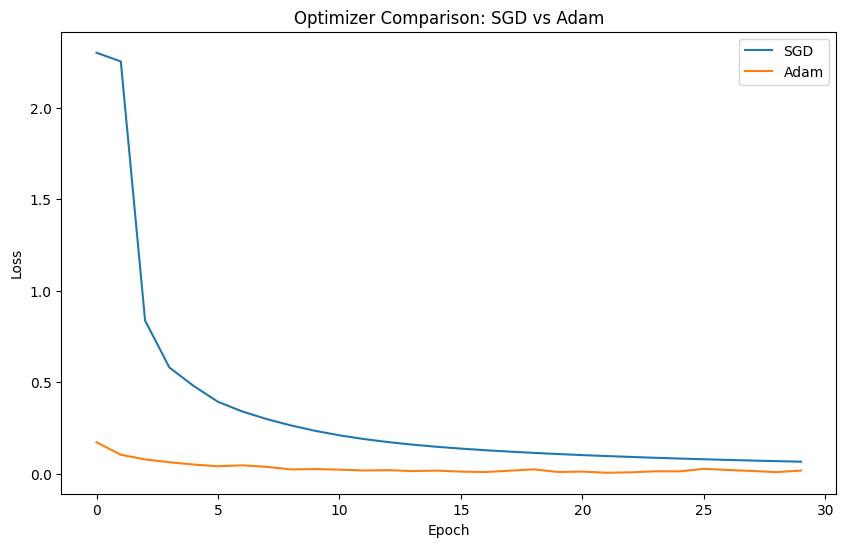

In [ ]:

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Optimizer Comparison: SGD vs Adam')
plt.legend()
plt.show()

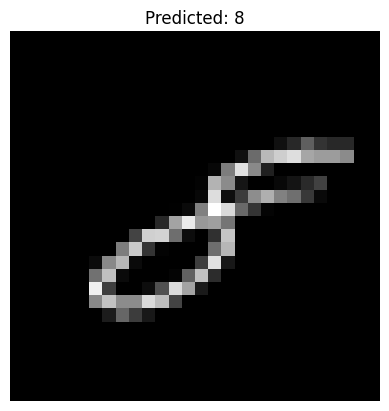

The model predicts: 8


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import requests
from io import BytesIO

model = best_model
IMAGE_PATH = "/content/mnist_images/8/8_0032.png"

def prepare_image(img_path):
    try:
        if img_path.startswith('http'):
            img = Image.open(BytesIO(requests.get(img_path).content))
        else:
            img = Image.open(img_path)
        img = img.convert('L').resize((28, 28))
        img_array =  np.array(img)

        return img_array.flatten() / 255.0
    except Exception as e:
        print(f" Error loading image: {e}")
        return None


processed_img = prepare_image(IMAGE_PATH)
if processed_img is not None:
    prediction = model.predict(processed_img.reshape(1, -1))[0]

    #
    plt.imshow(processed_img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction}")
    plt.axis('off')
    plt.show()

    print(f"The model predicts: {prediction}")
else:
    print("No prediction due to image processing error.")